# High School Math Scores 

In this project a simple regression analysis of the [dataset](https://www.kaggle.com/datasets/janiobachmann/math-students) from Kaggle will be conducted which contains math scores of high school students from two different public schools from Portugal. The aim is predict the final math grade of the students via various regression models and finding the best model.

## **Import the required libraries**

In [166]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats.mstats import normaltest # D'Agostino K^2 Test


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter("ignore")



## **Reading and understanding of the data**

The was collected by two reseachers from Portugal, there corresponing paper can be found [here](http://www3.dsi.uminho.pt/pcortez/student.pdf). The data was supposed to be collected during the 2005-2006 school year from two public secondary schools in Portugal from the Alentejo Region, which covers a large part of the southern region of Portugal. The data contains three grades for each student columns `G1`, `G2` and `G3`. `G1` and `G2` correspondent to the grade first and second period respectively. And `G3` corresponds to the final grade. It is not fully clear hear how `G3` is assessed. The paper only says "During the school year, students are evaluated in three periods and the last evaluation (G3 of Table 1) corresponds to the final grade". So just assume `G3` is somehow a final evaluation, may it be a written exam or whatever. <br>
This is the target variable which will be predicted based on the other features such as family or study behaviour. In the end it appears that the second grade is a good predictor for the final grade, while the other features except the first grade having only a minor impact. For a full description of the features the reader may look at the [datasource](https://www.kaggle.com/datasets/janiobachmann/math-students).

In [167]:
# Import the data 
data = pd.read_csv('student-mat.csv')
print(data.shape)

(395, 33)


In [2]:
1.2*0.75/(0.6+0.75)

0.6666666666666665

There are 395 obsevations in the dataset with 33 variables.

In [168]:
data.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# **Explanatory Analysis**

Find more information about the features and types using the `info()`  method.


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Ensure that there are no duplicates in the dataset.

In [170]:
data.drop_duplicates(inplace=True)

Take a first look at the target variable, the final grade by looking at its distribution.

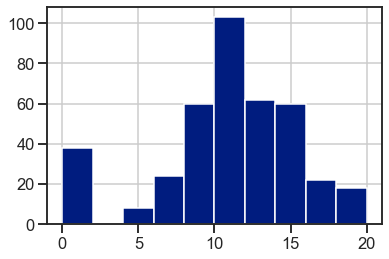

In [171]:
data.G3.hist();

One can see that there is bump between 0 and 5. There should be a smooth distribution. One interpreation is that having zero points should be a rare exception, and if one really tries one should get at last one point. Thus delete these rows and reset index.

In [172]:
# Import the data 
data.drop(index=data.loc[data['G3']==0].index,inplace=True)
data.reset_index(drop=True, inplace=True)

Plot data again.

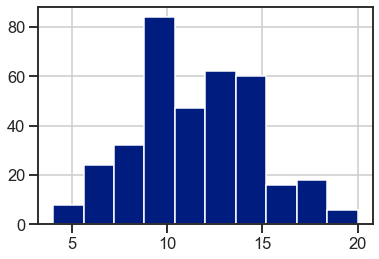

In [173]:
data.G3.hist();

## Test target variable for normality

Test whether the target variable is normaly distributed.

In [174]:
normaltest(data.G3.values)

NormaltestResult(statistic=6.102380454040675, pvalue=0.04730259005165342)

Based on the p-value the formally the target variable is not normally distributed, but pretty close since the p-value is close to 0.05.  

Take a look at the numerical and ordinal attributes. 

In [175]:
data.describe(exclude='object')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Look at correlations of numerical features with the target variable.

In [176]:
data.corr()['G3']

age          -0.140372
Medu          0.190308
Fedu          0.158811
traveltime   -0.099785
studytime     0.126728
failures     -0.293831
famrel        0.037711
freetime     -0.021589
goout        -0.177383
Dalc         -0.140690
Walc         -0.190054
health       -0.081691
absences     -0.213129
G1            0.891805
G2            0.965583
G3            1.000000
Name: G3, dtype: float64

One can see that the second period grade highly corrolated with the final grade while the other variables except the first garde having only a minor impact. So the the second grade already seems to be good predictor. Look at a scatter plot of the grades.

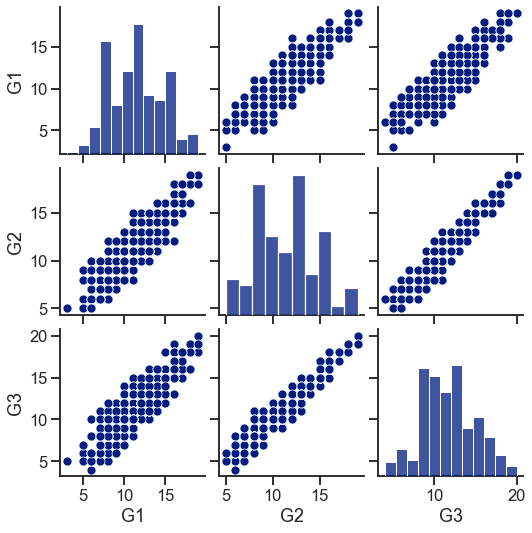

In [177]:
sns.pairplot(data[['G1','G2','G3']])

Lets take a look if one just takes second grade as a predictor.

In [178]:
predictor = data['G2']-data['G3']
predictor.describe()

count    357.000000
mean      -0.165266
std        0.840093
min       -3.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max        2.000000
dtype: float64

By looking at these summary statistics one can see that the second grade is already a very good predictor with little variance and maximum deviation of three points. 


In [179]:
data['G2']-data['G3'].mean()

0     -5.52381
1     -6.52381
2     -3.52381
3      2.47619
4     -1.52381
        ...   
352   -2.52381
353    4.47619
354   -3.52381
355    0.47619
356   -2.52381
Name: G2, Length: 357, dtype: float64

One can see that the second grade is already a good predictor.

Now take a look the categorical attributes.

In [180]:
data.describe(exclude='int64')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,315,185,279,250,318,127,196,126,248,307,219,184,180,286,343,299,245


To summarize these results most students live in a urban area, have access to internet and their parents live together. Also most students have no extra educational report(schoolsup). 

Remove some columns for simplicity. In the end for the regression analysis, only a few attributes will be kept anyway.

In [181]:
data.drop(columns=['Mjob','Fjob','reason','guardian'],inplace = True)

Now look for correlations between target variable and categorical variables, by boxplots for each attribute by the final grade.

In [182]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [183]:
categorical_cols = list(categorical_cols)


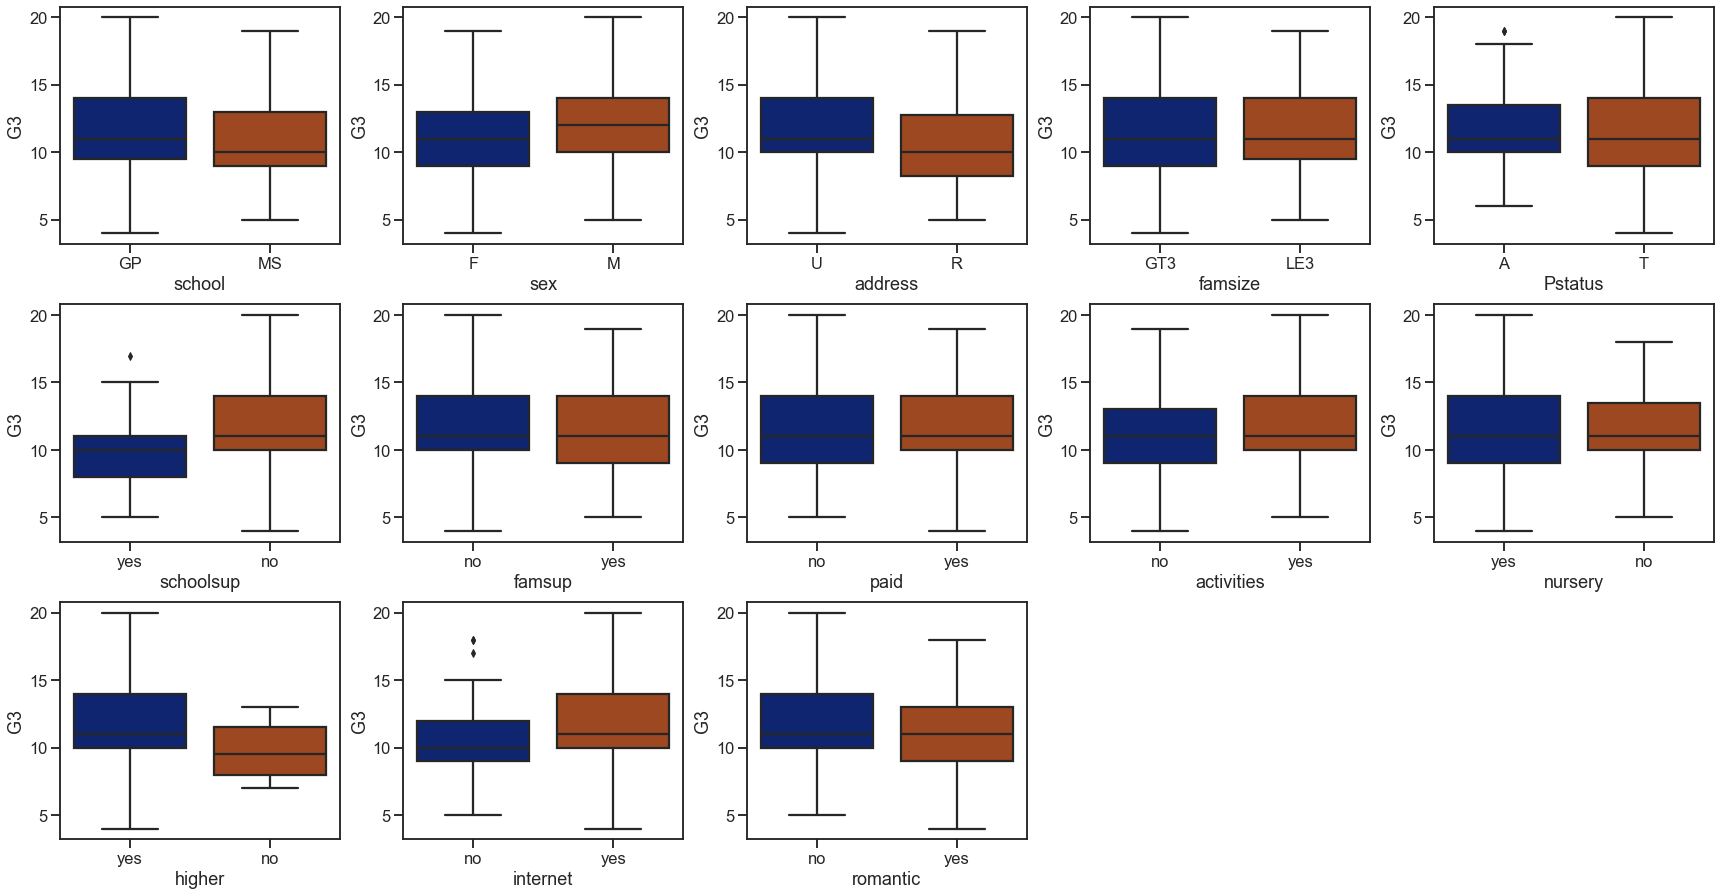

In [184]:
fig = plt.figure(figsize=(24,16))


a = 4  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

for i in list(categorical_cols):
    plt.subplot(a,b,c)                
    plt.xlabel(i)
    sns.boxplot(x=i,y='G3',data=data)
    c = c + 1
    
plt.tight_layout()
plt.show()

One can see that students being male,  living in urban area, having access to internet have slightly better grades.

# Predictive analysis

The goal of this section is predict the final grade via several regression models and finding the best model.

Previously it has been seen that using the second grade is a good predictor for the target variable since they are highly corrolated. The question is can one build a model captures the little variance between the two models.

Take a look at the r2 score.

In conclusion this very simple model is already a good predictor. In the follwing try to use the sophisticated regression models 
and check whether they yield better results.

First transform the categorical variables so that they can be applied to the machine learning models.

In [185]:
mask2 = data.dtypes == np.float
float_cols = data.columns[mask2]

In [186]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

13

In [187]:

# Copy of the data
data2 = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data = data.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data = pd.concat([data, new_df], axis=1)

In [188]:
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_0,activities_1,nursery_0,nursery_1,higher_0,higher_1,internet_0,internet_1,romantic_0,romantic_1
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,3,4,3,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,20,2,2,1,2,2,5,5,4,4,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
353,17,3,1,2,1,0,2,4,5,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
354,21,1,1,1,1,3,5,5,3,3,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
355,18,3,2,3,1,0,4,4,1,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# Testing regression

Find for each Linear regression, Lasso Regression and Ridge Regression the best model via `GridSearchCV` to get the best hyperparameters.

First some preparations.

In [189]:

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

y_col = 'G3'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]

#feature_cols = ['G1','G2']
X = data[feature_cols]
y = data[y_col]


In [190]:
data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_0', 'school_1', 'sex_0', 'sex_1', 'address_0',
       'address_1', 'famsize_0', 'famsize_1', 'Pstatus_0', 'Pstatus_1',
       'schoolsup_0', 'schoolsup_1', 'famsup_0', 'famsup_1', 'paid_0',
       'paid_1', 'activities_0', 'activities_1', 'nursery_0', 'nursery_1',
       'higher_0', 'higher_1', 'internet_0', 'internet_1', 'romantic_0',
       'romantic_1'],
      dtype='object')

Look which attributes are most corrolated to the target variable.

In [191]:
features = data.corr()['G3'].sort_values()

<AxesSubplot:>

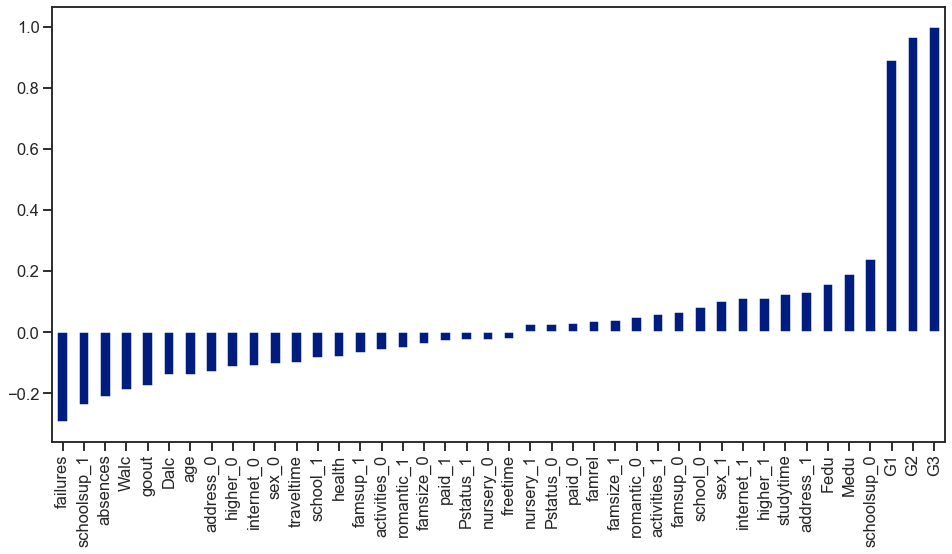

In [192]:
features.plot(kind='bar',figsize=(16,8))

Apply dimension reduction by discarding all variables from the model whose absolute corrolation coeffcient is less than 0.2.

In [193]:
reduced_features = []


features['failures']

for feature in features.keys():
    if  1 > abs(features[feature]) >= 0.2:
        reduced_features.append(feature)

len(reduced_features)

6

In [194]:
reduced_features.remove('schoolsup_1')
reduced_features

['failures', 'absences', 'schoolsup_0', 'G1', 'G2']

In [195]:
X = X[reduced_features]

The only the remaining features are the first and second grade, the number of past class failures(failures), the  number of school absences(absences),and whether there is extra educational support(schoolsup_0).

## Linear regression

In [196]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_refression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    
}

grid = GridSearchCV(estimator, params, cv=kf)

In [197]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_refression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [198]:
grid.best_score_, grid.best_params_

(0.9311739098466475, {'polynomial_features__degree': 1})

## Lasso Regression 

In [199]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator2 = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params2 = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(1e-9, 1e0, num=10)
}

grid2 = GridSearchCV(estimator2, params2, cv=kf)

In [200]:
np.geomspace(1e-9, 1e0, num=10)

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [201]:
grid2.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00]),
                         'polynomial_features__degree': [1, 2, 3]})

In [202]:
grid2.best_score_, grid2.best_params_

(0.9314423118817897,
 {'lasso_regression__alpha': 0.01, 'polynomial_features__degree': 1})

## Ridge Regression

In [203]:
# Same estimator as before
estimator3 = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params3 = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.1, 2, 20)
}

grid3 = GridSearchCV(estimator3, params3, cv=kf)

In [204]:
grid3.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([0.1       , 0.11707799, 0.13707256, 0.1604818 , 0.18788887,
       0.21997651, 0.25754408, 0.30152744, 0.35302227, 0.41331138,
       0.48389667, 0.5665365 , 0.66328955, 0.77656608, 0.90918797,
       1.06445901, 1.24624723, 1.45908123, 1.70826299, 2.        ])})

In [205]:
grid3.best_score_, grid3.best_params_

(0.9312384854632251,
 {'polynomial_features__degree': 1,
  'ridge_regression__alpha': 0.909187970690782})

As a result Lasso Regression performs best with parameters alpha=0.01 and polynomial degree 1.

## Best Estimator

Fit the found best estimator on the whole dataset and see how well it performs.

In [206]:
s = StandardScaler()

best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=1)),
                    ("lasso_regression", Lasso(alpha=0.01))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9355996577059758

Look how well the truth values are predicted by the model.

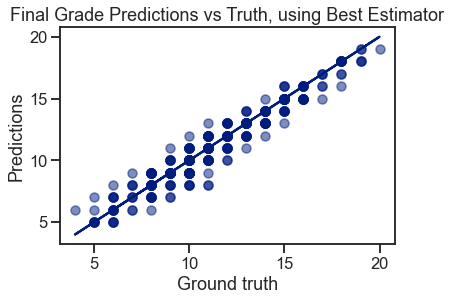

In [207]:
y_predict = np.round(best_estimator.predict(X))


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.plot(y,y)
ax.scatter(y, y_predict, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Final Grade Predictions vs Truth, using Best Estimator');




Look at the r2 score and compare it with the r2 score of the simple predictor by just taking the second grade.

In [208]:
r2_score(y_predict,y)

0.9270133787724749

In [209]:
r2_score(data['G2'],data['G3'])

0.9259806803196644

One can see that the simple second grade predictor does slightly better.

Lastly, look the final predictor differs from the second grade.

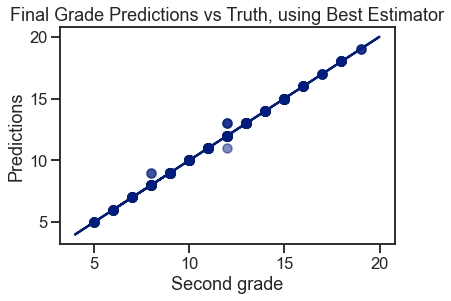

In [210]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.plot(y,y)
ax.scatter(data['G2'], y_predict, alpha=.5)

ax.set(xlabel='Second grade', 
       ylabel='Predictions',
       title='Final Grade Predictions vs Truth, using Best Estimator');

One can see that the predictions are mostly identical to the second grade.

## Conclusion

The second grade is already a good predictor for the final grade and it is hard to capture the little variance between the second grade and final grade by the remaining features using any regression model.